# Image Encryption Using Tangent over Cosine Cosine map and Sha3

In [1]:
image_url="C:\\Users\\USER PC\\Pictures\\Screenshots\\Screenshot (27).png"

# Loading original image

(-0.5, 1365.5, 767.5, -0.5)

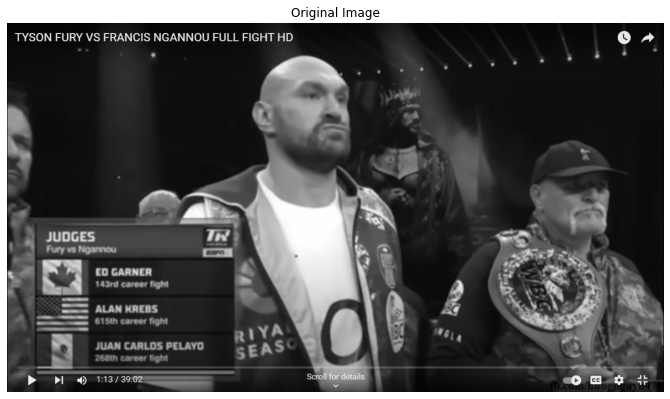

In [3]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image using Pillow
image_path =image_url
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Normalize the image data to [0, 1]
normalized_image = image_array / 255.0

# Display the original image
plt.figure(figsize=(40, 20))
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')


In [24]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
from skimage.filters import sobel


# Encryption

(-0.5, 1365.5, 767.5, -0.5)

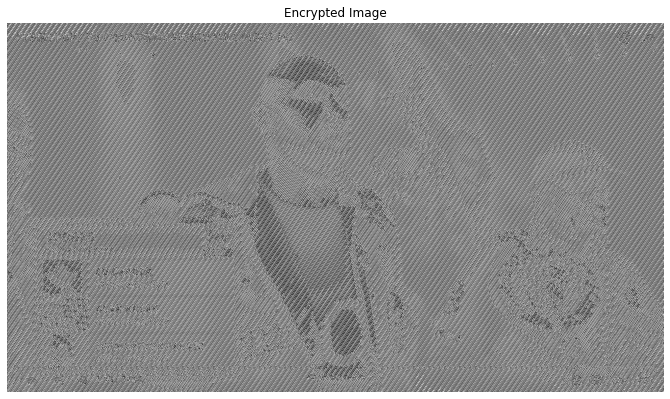

In [22]:
# Define the encryption transformation using tan and cos squared
def encrypt_tan_cos(x, k):
    return np.tan(k * x) / (np.cos(k * x) ** 2 + 1e-10)  # Adding a small value to avoid division by zero

# Define the decryption transformation
def decrypt_tan_cos(y, k):
    # Approximate the inversion using arctan for small angles
    return np.arctan(y * (np.cos(k) ** 2)) / k

k = np.pi / 8  # Scaling factor to keep values in a reasonable range
encrypted_image = encrypt_tan_cos(normalized_image, k)

# Generate SHA-3 hash to create a key
password = 'your_password'
sha3_hash = hashlib.sha3_256(password.encode()).digest()
key = np.frombuffer(sha3_hash, dtype=np.uint8)
key = np.resize(key, (image_array.shape[0], image_array.shape[1]))
key = key / 255.0  # Normalize key to [0, 1]

# Encrypt the image with the key (combining key for further encryption)
encrypted_image_with_key = (encrypted_image + key) % 1.0

# Display the encrypted image
plt.figure(figsize=(40,20))
plt.subplot(1, 3, 2)
plt.imshow(encrypted_image_with_key, cmap='gray')
plt.title('Encrypted Image')
plt.axis('off')

# Decryption

# Decrypting with incorrect Key

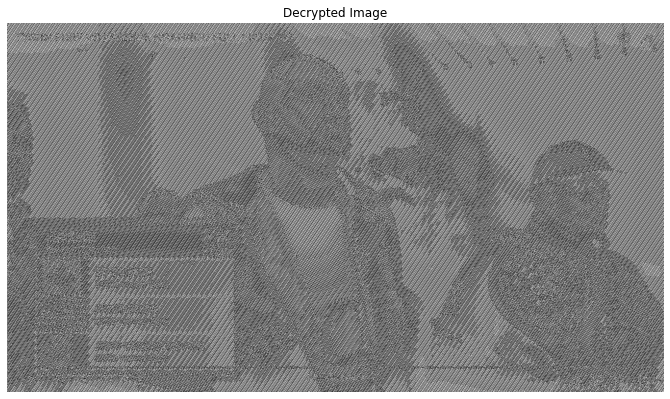

In [19]:
# Decrypt the image (subtract the key)
password='incorrect_password'
sha3_hash = hashlib.sha3_256(password.encode()).digest()
key = np.frombuffer(sha3_hash, dtype=np.uint8)
key = np.resize(key, (image_array.shape[0], image_array.shape[1]))
key = key / 255.0  # Normalize key to [0, 1]
decrypted_image_with_key = (encrypted_image_with_key - key) % 1.0

# Apply the inverse transformation
decrypted_image = decrypt_tan_cos(decrypted_image_with_key, k)
decrypted_image = (decrypted_image * 255).astype(np.uint8)

# Display the decrypted image
plt.figure(figsize=(40,20))
plt.subplot(1, 3, 3)
plt.imshow(decrypted_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()

# Decrypting with Correct Key

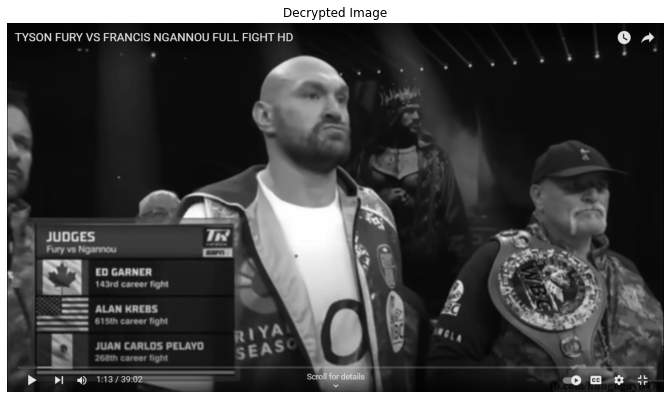

In [20]:
# Decrypt the image (subtract the key)
password='your_password'
sha3_hash = hashlib.sha3_256(password.encode()).digest()
key = np.frombuffer(sha3_hash, dtype=np.uint8)
key = np.resize(key, (image_array.shape[0], image_array.shape[1]))
key = key / 255.0  # Normalize key to [0, 1]
decrypted_image_with_key = (encrypted_image_with_key - key) % 1.0

# Apply the inverse transformation
decrypted_image = decrypt_tan_cos(decrypted_image_with_key, k)
decrypted_image = (decrypted_image * 255).astype(np.uint8)

# Display the decrypted image
plt.figure(figsize=(40,20))
plt.subplot(1, 3, 3)
plt.imshow(decrypted_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()

# Evaluation

# Imperceptibility Analysis

In [25]:


# Calculate PSNR and SSIM
psnr_value = peak_signal_noise_ratio(image_array, decrypted_image)
ssim_value = structural_similarity(image_array, decrypted_image)

# Calculate MAE
mae_value = np.mean(np.abs(image_array - decrypted_image))

# Calculate MSE
mse_value = mean_squared_error(image_array, decrypted_image)

# Calculate GEI
def gradient_error_index(original, decrypted):
    grad_original = sobel(original)
    grad_decrypted = sobel(decrypted)
    return np.mean((grad_original - grad_decrypted) ** 2)

gei_value = gradient_error_index(image_array, decrypted_image)

print(f"PSNR: {psnr_value} dB")
print(f"SSIM: {ssim_value}")
print(f"MAE: {mae_value}")
print(f"MSE: {mse_value}")
print(f"GEI: {gei_value}")

# Save the metrics results
with open('imperceptibility_analysis.txt', 'w') as file:
    file.write(f"PSNR: {psnr_value} dB\n")
    file.write(f"SSIM: {ssim_value}\n")
    file.write(f"MAE: {mae_value}\n")
    file.write(f"MSE: {mse_value}\n")
    file.write(f"GEI: {gei_value}\n")

PSNR: 29.91084807988163 dB
SSIM: 0.9838010554237315
MAE: 6.815264305758907
MSE: 66.37362737920937
GEI: 1.7653184481397086e-05


# Robustness Analysis

Robustness Analysis for Gaussian Noise:
PSNR: 9.135355117523913 dB
SSIM: 0.04531649684596515
MAE: 129.5357520055515
MSE: 7934.961960293131
GEI: 0.043090165993442654




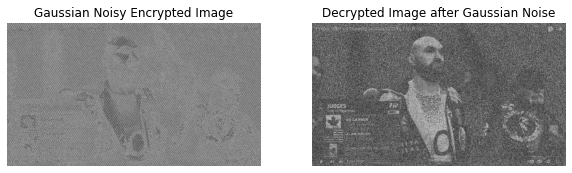

Robustness Analysis for Salt and Pepper Noise:
PSNR: 26.076247361713826 dB
SSIM: 0.7945903575813927
MAE: 8.13671875
MSE: 160.49282614995118
GEI: 0.0010036179986335158




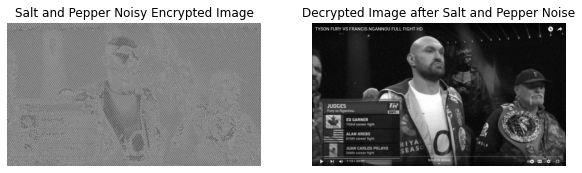

Robustness Analysis for Speckle Noise:
PSNR: 11.085015956789366 dB
SSIM: 0.10884264770275884
MAE: 103.81256958424841
MSE: 5064.99201687561
GEI: 0.036174216347975505




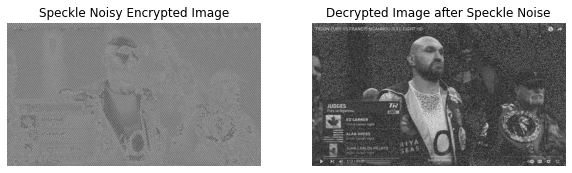

In [29]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
from skimage.util import random_noise
from skimage.filters import sobel

# Introduce various types of noise
noisy_images = {
    'Gaussian': random_noise(encrypted_image_with_key, mode='gaussian', var=0.01),
    'Salt and Pepper': random_noise(encrypted_image_with_key, mode='s&p', amount=0.01),
    'Speckle': random_noise(encrypted_image_with_key, mode='speckle', var=0.01)
}

# Function to calculate robustness metrics
def calculate_metrics(original, decrypted):
    psnr_value = peak_signal_noise_ratio(original, decrypted)
    ssim_value = structural_similarity(original, decrypted)
    mae_value = np.mean(np.abs(original - decrypted))
    mse_value = mean_squared_error(original, decrypted)
    gei_value = np.mean((sobel(original) - sobel(decrypted)) ** 2)
    return psnr_value, ssim_value, mae_value, mse_value, gei_value

# Decrypt and evaluate noisy images
for noise_type, noisy_image in noisy_images.items():
    decrypted_noisy_image_with_key = (noisy_image - key) % 1.0
    decrypted_noisy_image = decrypt_tan_cos(decrypted_noisy_image_with_key, k)
    decrypted_noisy_image = (decrypted_noisy_image * 255).astype(np.uint8)
    
    psnr_value, ssim_value, mae_value, mse_value, gei_value = calculate_metrics(image_array, decrypted_noisy_image)
    
    print(f"Robustness Analysis for {noise_type} Noise:")
    print(f"PSNR: {psnr_value} dB")
    print(f"SSIM: {ssim_value}")
    print(f"MAE: {mae_value}")
    print(f"MSE: {mse_value}")
    print(f"GEI: {gei_value}")
    print("\n")

    # Display the noisy encrypted and decrypted images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'{noise_type} Noisy Encrypted Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(decrypted_noisy_image, cmap='gray')
    plt.title(f'Decrypted Image after {noise_type} Noise')
    plt.axis('off')
    plt.show()
